Rising or Regressing? Global Trends in Economic Rights (2017–2023)

This analysis explores how economic rights have changed over time across countries, using data from the Human Rights Measurement Initiative (HRMI). It uses both income-adjusted and global-best benchmarks across income groups to identify whether the world is making progress and where the disparities lie.


In [10]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt


Insight 1: Are economic rights improving globally?

We begin by calculating the global average of the Income-Adjusted Economic and Social Rights (ESR) Scores over time. This helps us understand whether the overall provision of economic rights is improving or declining.

We use:
`esr_hiy_incomeadjusted.csv` for high-income countries
'esr_lmy_incomeadjusted.csv` for low- and middle-income countries


In [11]:
# Load datasets
df_hiy = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_hiy_incomeadjusted.csv")
df_lmy = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_lmy_incomeadjusted.csv")

df_hiy_clean = df_hiy[["Country", "Year", "HiY_QofL_All_IAScore"]].rename(columns={"HiY_QofL_All_IAScore": "esr_score"})
df_lmy_clean = df_lmy[["Country", "Year", "LMY_QofL_All_IAScore"]].rename(columns={"LMY_QofL_All_IAScore": "esr_score"})

df_filtered = df_avg[df_avg["Year"] >= 2010]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_filtered["Year"], df_filtered["esr_score"], marker="o", color="blue", linewidth=2)

# Add point labels
for x, y in zip(df_filtered["Year"], df_filtered["esr_score"]):
    plt.text(x, y + 0.15, f"{y:.1f}", ha='center', fontsize=9)

# Formatting
plt.title("Global Average of Economic and Social Rights (Income-Adjusted)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average ESR Score", fontsize=12)
plt.xticks(df_filtered["Year"], rotation=45)
plt.yticks(range(int(df_filtered["esr_score"].min()), int(df_filtered["esr_score"].max()) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_hiy_incomeadjusted.csv'

Interpretation:
The chart illustrates the global average of income-adjusted economic and social rights (ESR) scores over time.

From 2010 through about 2017, the rising trend line suggests that the majority of countries were making measurable progress toward fulfilling core economic and social rights commitments (such as healthcare, education, and housing) in proportion to their incomes.

A notable decline after 2017 indicates a short-term deterioration in performance. This fall could be due to policy changes, budgetary problems, global events, or data collection variability. However, the scores once again begin to improve after 2019, showing indications of stabilization or steady improvement.

Although there have been some fluctuations, the general trend since 2010 is upward, indicating that on average, states are moving towards fulfilling economic and social rights obligations in terms of available resources.

Insight 2: Which countries saw the biggest change?

Now let’s find out which countries improved the most — and which declined — between 2017 and 2023.

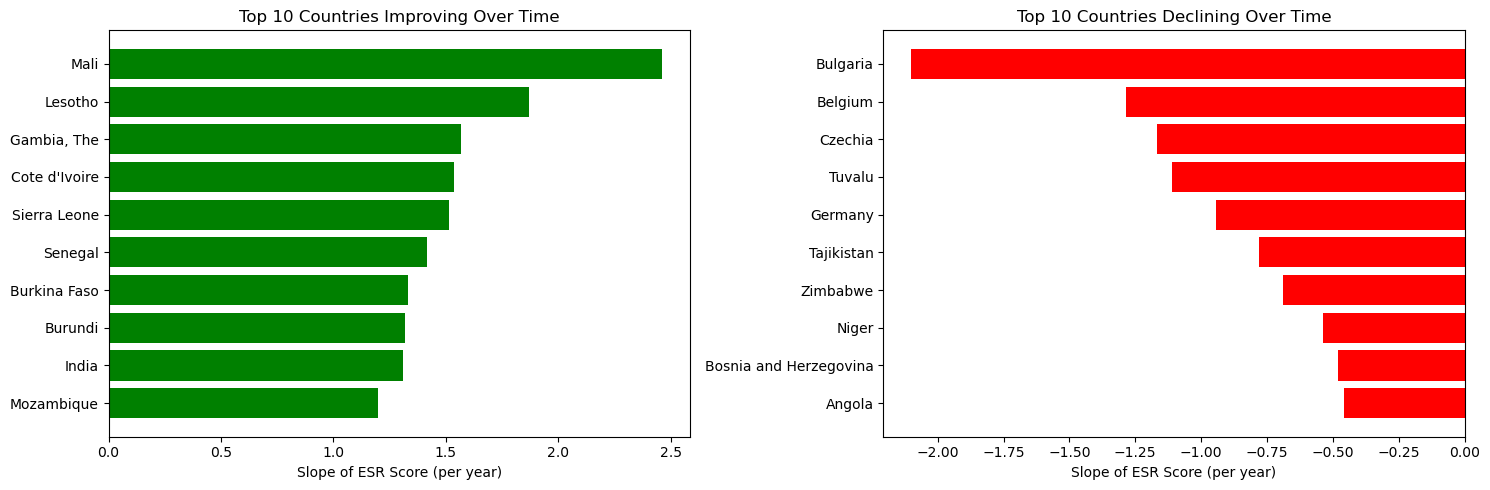

In [ ]:
# Get scores in 2017 and 2023
from scipy.stats import linregress

# Create a slope list for each country
slopes = []

# Loop through countries
for country in df["Country"].unique():
    subset = df[df["Country"] == country].dropna()
    if subset["Year"].nunique() >= 3:  # at least 3 points to estimate trend
        x = subset["Year"]
        y = subset["esr_score"]
        slope, _, _, _, _ = linregress(x, y)
        slopes.append({"Country": country, "Slope": slope})

# Turn into DataFrame
df_slopes = pd.DataFrame(slopes)

# Top 10 improving/declining countries based on trend
top_risers = df_slopes.sort_values("Slope", ascending=False).head(10)
top_fallers = df_slopes.sort_values("Slope").head(10)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Left: Top risers
ax[0].barh(top_risers["Country"], top_risers["Slope"], color="green")
ax[0].set_title("Top 10 Countries Improving Over Time")
ax[0].invert_yaxis()
ax[0].set_xlabel("Slope of ESR Score (per year)")

# Right: Top fallers
ax[1].barh(top_fallers["Country"], top_fallers["Slope"], color="red")
ax[1].set_title("Top 10 Countries Declining Over Time")
ax[1].invert_yaxis()
ax[1].set_xlabel("Slope of ESR Score (per year)")

plt.tight_layout()
plt.show()


Interpretation:
Instead of comparing the trend for the first two years, this analysis calculates the trend over the years (slope) of each nation's income-adjusted ESR score for the period from 2017 to 2023. A positive slope indicates that every year improves, and a negative slope indicates that it worsens.

Countries that improved the most are like Mali, Lesotho, and Gambia, which show consistent increases in ESR scores from year to year. This may be a sign of progress in the delivery of education, health, and basic services relative to available resources.
On the other hand, countries like Bulgaria, Belgium, and Czechia have experienced the steepest declines in ESR performance over these years. A negative trend in these countries may be due to policy regression, economic problems, or declining alignment with expected human rights standards.
This slope measure of the change captures not only point-in-time but also direction and consistency in each country's performance. It illustrates that some lower-income countries are actually gaining ground, while even richer or middle-income countries can fall behind if economic rights are not being attended to.


Insight 3: Are low-income countries catching up to the global best?

Finally, let’s look at the performance gap between low- and middle-income countries and the global best scores.

We use:
- `esr_lmy_incomeadjusted.csv` for actual scores
- `esr_lmy_globalbest.csv` for benchmark scores


In [ ]:
# Load benchmark data
df_lmy_best = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_lmy_globalbest.csv")
df_lmy_actual = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_lmy_incomeadjusted.csv")

# Group by year
df_lmy_best = df_lmy_best.rename(columns={"LMY_QofL_All_GBScore": "esr_score"})
df_lmy_actual = df_lmy_actual.rename(columns={"LMY_QofL_All_IAScore": "esr_score"})

# Group by year
actual_avg = df_lmy_actual.groupby("Year")["esr_score"].mean().reset_index()
best_avg = df_lmy_best.groupby("Year")["esr_score"].mean().reset_index()

# Merge for comparison
merged = actual_avg.merge(best_avg, on="Year", suffixes=("_actual", "_best"))
merged["gap"] = merged["esr_score_best"] - merged["esr_score_actual"]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(merged["Year"], merged["esr_score_best"], label="Global Best Benchmark", marker="o")
plt.plot(merged["Year"], merged["esr_score_actual"], label="Low/Mid-Income Average", marker="o")
plt.fill_between(merged["Year"], merged["esr_score_actual"], merged["esr_score_best"], alpha=0.1)
plt.title("Low/Mid-Income vs Global Best: Economic Rights Scores")
plt.xlabel("Year")
plt.ylabel("ESR Score")
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

Interpretation:
This graph compares the low- and middle-income countries' mean income-adjusted ESR score to the world best benchmark from 2010 to 2021. Shaded area is the difference between them.

We are observing a consistent performance gap, where world best scores remain significantly higher than the LMY (low/mid-income) mean. Although both lines each have an upward trend across years, the gap is fairly consistent, indicating that low- and middle-income countries are catching up but not actually closing the gap to the world ideal.

There is a minor drop of the gap in the years 2014–2016 that indicates momentary convergence and re-widening afterwards. Despite the progress indicated, the trend shows that structural inequality and resource limitations remain challenges to low-income countries to deliver the optimal possible results in economic and social rights.

Overall, the facts indicate that while progress is being made throughout the world, equity in progress continues to be a key issue. Policy and international support programs may be called for to continue accelerating progress for poorer countries.

Conclusion

The breakdown in the analysis provides a subtle picture of global economic rights development between 2017 and 2023. On average, income-adjusted economic and social rights (ESR) scores have increased globally, with the implication that countries are making serious strides in meeting minimum rights commitments based on what they can afford. However, the progress was not even.

By examining country-level trends, we can see that certain lower-income nations such as Mali, Lesotho, and Gambia have demonstrated consistent progress, indicative of successful effort at expanding coverage for education, health, and other basic services. A group of middle- or high-income nations such as Bulgaria, Belgium, and Czechia, however, have registered negative trends, the indicators of which are that backsliding can occur even where capacity exists.

When we compare low- and middle-income countries to world best practice, we notice that even though both groups are improving, the performance gap remains unchanged. This means that while there is improvement, it is not spread evenly and poor countries still have structural barriers to overcome before they can close the gap completely.

In short, the world is collectively on the move, but too slowly and not uniformly enough. If the international community really wishes to turn economic rights into reality for all, more concentrated assistance and sustained policy commitment will have to fill the gap and meet inclusive progress.
